<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Methods" data-toc-modified-id="Methods-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Methods</a></span><ul class="toc-item"><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>DBSCAN</a></span></li><li><span><a href="#One-Class-SVM" data-toc-modified-id="One-Class-SVM-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>One Class SVM</a></span></li></ul></li></ul></div>

# Anomaly Detection

## Introduction

**Anomaly detection** is an important problem in machine
learning and has a wide range of applications such as fraud
detection, intrusion detection, event detection and health care (spotting a malignant tumor in an MRI scan). 
In most anomaly detection problems, a lot of normal data is given, and the task is to detect
anomalies that deviates from the normal data. 
**Anomaly detection** algorithms model the data distribution and then report samples atypical in the distribution as anomalies.

There are various **ML** algorithms which are used for **Anomaly Detection**, in the notebook below we will explore some of those **ML** algorithms. Its hard to find datasets for **Anomaly Detection** hence we will mixture of Fraud, synthetic and vision data.


Some of the ML algorithms we will explore are:
1. Density-Based Anomaly Detection method like, **DBSCAN**.
2. Support Vector Machine-Based Anomaly Detection, **One Class SVM**.
3. Decision tree-Based Anomaly Detection, **Isolation Forest**.
4. Deep Neural Network-Based Anomaly Detection, **Autoencoders**.
5. GANs-Bases Anomaly Detection, **GANomaly**.

Some of the techniques like **DBSCAN** and **One Class SVM** are traditional **ML** techniques and others like **GANomaly** are cutting edge model deep learning techniques. Also there are many other methods which have been successfully applied to **Anomaly Detection** above list is a representative yet wide selection of methods in literature.

## Methods
### DBSCAN

**Density-based spatial clustering of applications with noise (DBSCAN)** is a very popular clustering algorithm proposed by Martin Ester et.al. 
https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf

It is a density-based clustering algorithm: given a set of points, it groups together points that are closely packed together, marking as anomalous the points that lie alone in low-density regions. One advantage of **DBSCAN** over **KMeans** is it can identify non circular clusters too. Below we show an example of using **DBSCAN** to identify anomalies/outliers in synthetic data. One of the limitation of **DBSCN** is it struggles from **Curse of dimensionality**, as the data becomes more higher dimensional **DBSCAN** underperfoms. 

Below we create synthetic data to show application of **DBSCAN**.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

%matplotlib inline

First we create synthetic data to show application of **DBSCAN**
Data set is sampled from three **Gaussian** distributions centered at, (0,0), (1,1) and (0,1)
And there are two outliers at (2,0) and (0,3). 

In [5]:
n_points_per_cluster = 100

#Cluster 1 at -> (0,0)
C1 = [0, 0] + .1 * np.random.randn(n_points_per_cluster, 2)
y1 = np.ones(shape=n_points_per_cluster)

#Cluster 2 at -> (1,1)
C2 = [1, 1] + .1 * np.random.randn(n_points_per_cluster, 2)
y2 = np.ones(shape=n_points_per_cluster) + 1

#Cluster 3 at -> (0,1)
C3 = [0, 1] + .1 * np.random.randn(n_points_per_cluster, 2)
y3 = np.ones(shape=n_points_per_cluster) + 2

#Anomalies
C4 = np.array([[2,0],[0,3]])
y4 = [4,4]

X = np.vstack((C1, C2, C3, C4))
y = np.hstack((y1,y2,y3,y4))
y= y.astype('int')

<AxesSubplot:title={'center':'Cluster plot'}>

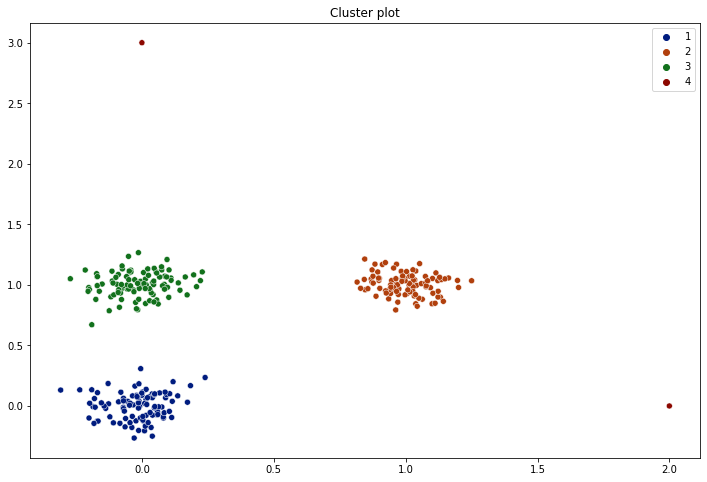

In [8]:
plt.figure(figsize=(12,8))
plt.title('Cluster plot')
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='dark')

From the above plots we can see there are three clusters 1,2, and 3 and then there are two outliers at (0,2) and (3,0). Now we will apply **DBSCAN** to identify these clusters and outliers.

In [9]:
#We initialize DBScan with epsilon of 0.2 and min_samples of 10
dbscan = DBSCAN(eps=0.2, min_samples=10)

In [10]:
y_dbscan = dbscan.fit_predict(X)

<AxesSubplot:>

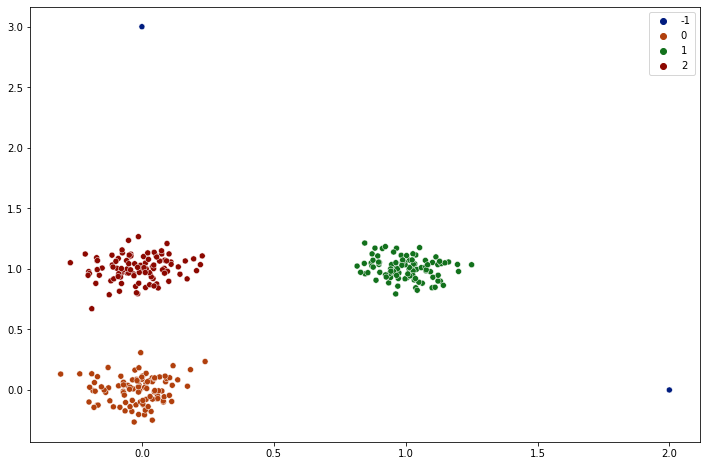

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_dbscan, palette='dark')

We can see from the plot above **DBSCAN** correctly identified the three clusters 0,1, and 2. 
And also identified the two outliers with -1.

This is a toy example but should illustrate the application of **DBSCAN**. Other popular variation of **DBSCAN** is **OPTICS** algorithm that algorithm can also identify clusters of very different densities.

### One Class SVM

Second ML method we want to discuss is **OneClassSVM**. **OneClassSVM** is an unsupervised learning algorithm that is trained only on the "normal" data. It learns the boundaries of normal data and classifies anything which is not inside the boundary as anomalous.


Method was originally proposed in this paper, http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.675.575&rep=rep1&type=pdf. Its still a fairly popular method for Anomaly detection especially when datasets are not that large.


Below we will demonstrate the use of **One Class SVM** on credit card fraud dataset from Kaggle https://www.kaggle.com/mlg-ulb/creditcardfraud.

There are 492 cases of fraud out of 284,807 transactions.